### EXAMEN 2 MEM

#### Miguel Ángel López Rojas

Complemento 1, PREGUNTAS DE CONCEPTO Y EJEMPLOS ILUSTRATIVOS: (50%)

In [1]:
#Ejemplo 1 de aprendizaje supervisado

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# cargamos el dataset iris
iris = load_iris()

# dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# creamos un clasificador de Bayes Nayve
classifier = GaussianNB()

# entrenamos el modelo
classifier.fit(X_train, y_train)

# predecimos las etiquetas para los datos de prueba
y_pred = classifier.predict(X_test)

In [3]:
#Ahora ploteamos para ver la dispersión de los puntos:

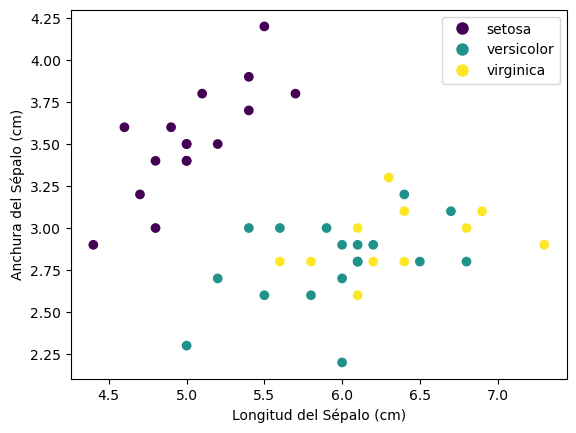

In [39]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
legend_elements = []
for i in range(len(iris.target_names)):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=iris.target_names[i], markerfacecolor=scatter.cmap(i/2), markersize=10))
plt.legend(handles=legend_elements)
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Anchura del Sépalo (cm)')
plt.show()

In [10]:
#Para NO SUPERVISADOS:

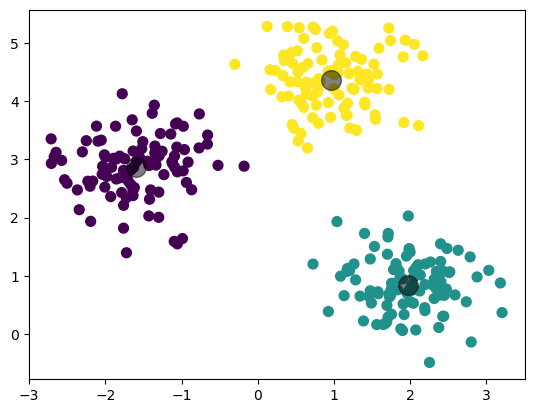

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generamos un conjunto de datos aleatorio
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

# Entrenamos el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

#### 2. Ejemplo de clasificación

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Cargamos el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividimos los datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un objeto DecisionTreeClassifier y lo ajustamos al conjunto de entrenamiento
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluamos la precisión del clasificador en el conjunto de prueba
accuracy = clf.score(X_test, y_test)

In [42]:
#Ploteamos el ejemplo:

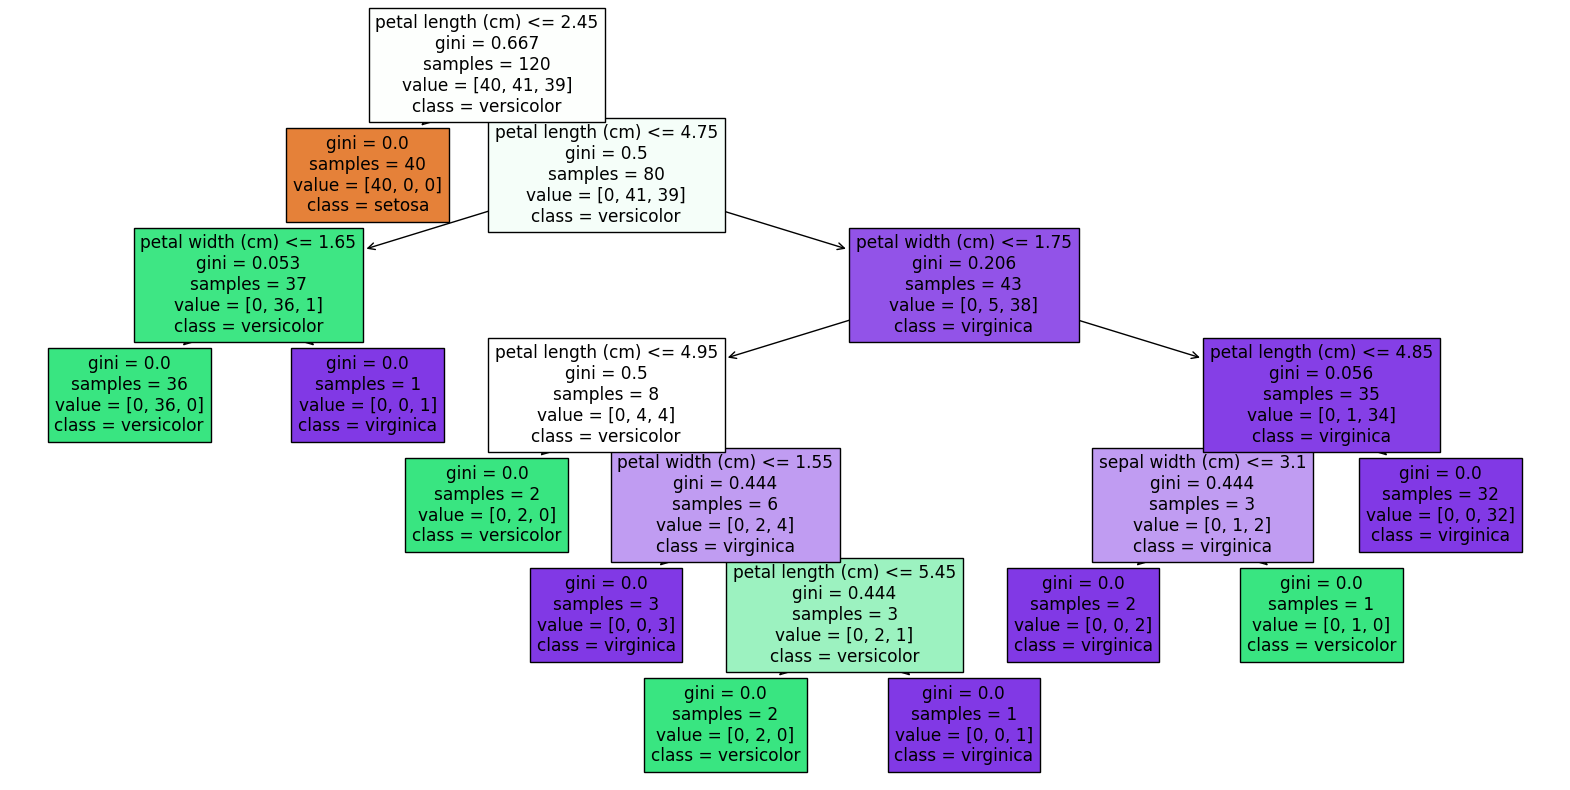

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
#Ejemplo de agrupamiento

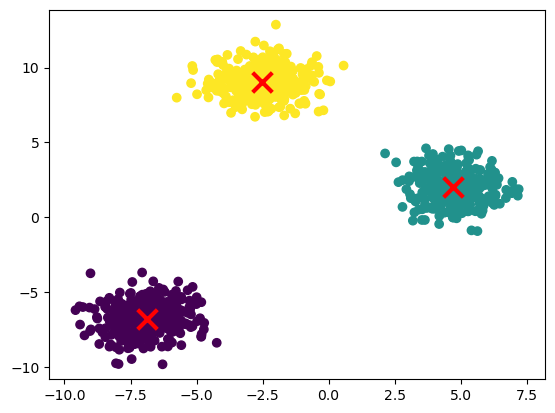

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generamos un conjunto de datos aleatorios
X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Creamos un objeto KMeans y lo ajustamos a los datos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtenemos las etiquetas de cada dato y los centroides de cada grupo
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Graficamos los datos con colores según sus etiquetas
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Graficamos los centroides de cada grupo
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

# Ajustamos los límites del gráfico
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Mostramos el gráfico
plt.show()

In [ ]:
#Ejemplo del ejercicio 9

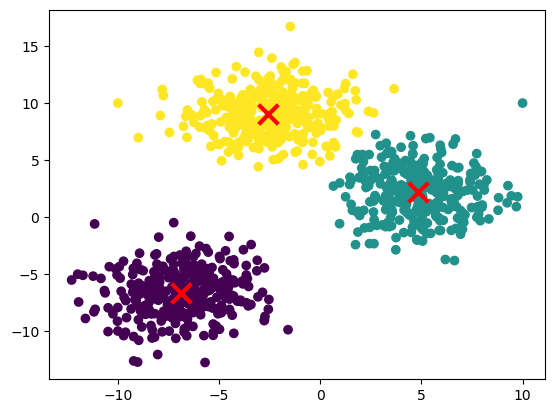

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generamos un conjunto de datos aleatorios con ruido
X, y = make_blobs(n_samples=1000, centers=3, random_state=42, cluster_std=2)

# Agregamos datos atípicos a los datos
outliers = [[-10, -10], [10, 10], [-10, 10]]
X = np.concatenate([X, outliers])

# Creamos un objeto KMeans y lo ajustamos a los datos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Ploteamos los grupos formados
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [47]:
#Ejemplo de diferencia entre metodos de escala:

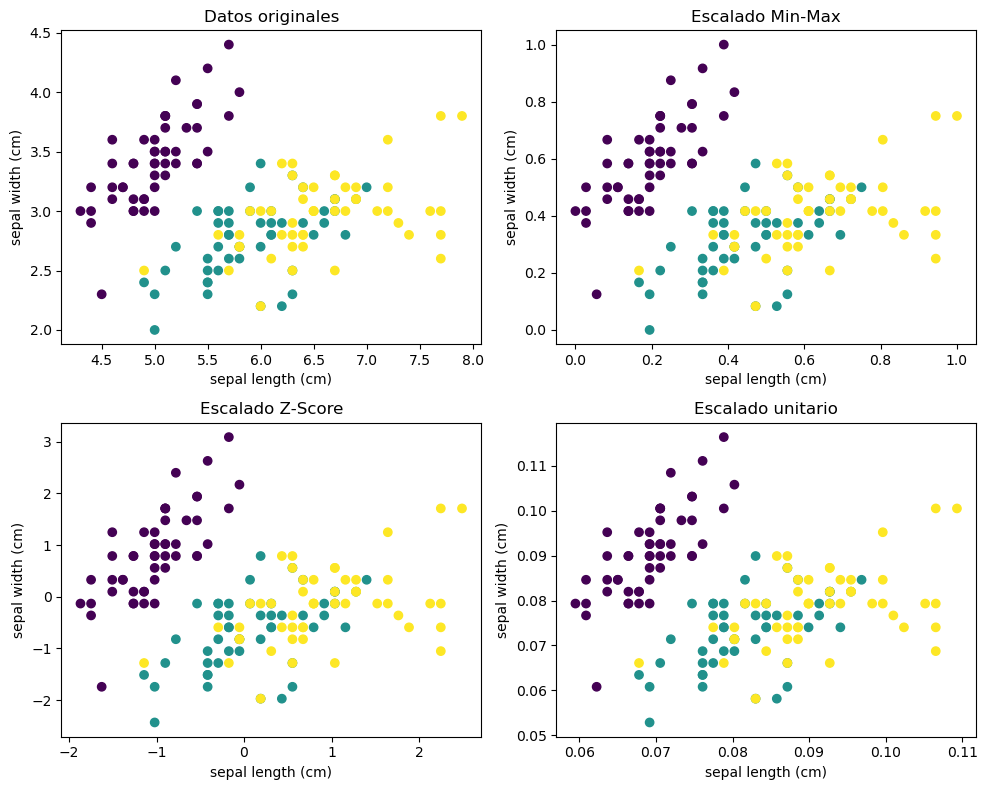

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Cargamos los datos de la base de datos Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Escalado Min-Max
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Escalado Z-Score
scaler_zscore = StandardScaler()
X_zscore = scaler_zscore.fit_transform(X)

# Escalado unitario
X_unit = X.apply(lambda x: x/np.linalg.norm(x), axis=0)

# Gráficas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=data.target)
ax0.set_title('Datos originales')
ax0.set_xlabel('sepal length (cm)')
ax0.set_ylabel('sepal width (cm)')

ax1.scatter(X_minmax[:, 0], X_minmax[:, 1], c=data.target)
ax1.set_title('Escalado Min-Max')
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal width (cm)')

ax2.scatter(X_zscore[:, 0], X_zscore[:, 1], c=data.target)
ax2.set_title('Escalado Z-Score')
ax2.set_xlabel('sepal length (cm)')
ax2.set_ylabel('sepal width (cm)')

ax3.scatter(X_unit['sepal length (cm)'], X_unit['sepal width (cm)'], c=data.target)
ax3.set_title('Escalado unitario')
ax3.set_xlabel('sepal length (cm)')
ax3.set_ylabel('sepal width (cm)')

plt.tight_layout()
plt.show()

In [ ]:
#Pregunta 14, desbalance de datos para aprendizaje de máquina

In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generar datos desbalanceados
X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=42)

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.936


## EJERCICIO NUMERICO Y ANALISIS DE RESULTADOS: (50%)

1.- First approach (20%)
a) Apply PCA or SVD for X

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [17]:
iris = load_iris()
X = iris.data
y= iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#Escalamos los datos:

In [20]:
escalador = StandardScaler()
x_std = escalador.fit_transform(X)

#Aplicamos PCA con dos componentes principales:

pca = PCA(n_components=2)
componentesPrincipales = pca.fit_transform(x_std)
principalDF = pd.DataFrame(data = componentesPrincipales,columns= ['PC1', 'PC2'])
principalDF

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [42]:
final_df = pd.concat([principalDF, pd.DataFrame(y, columns=['Target'])], axis=1)
final_df

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


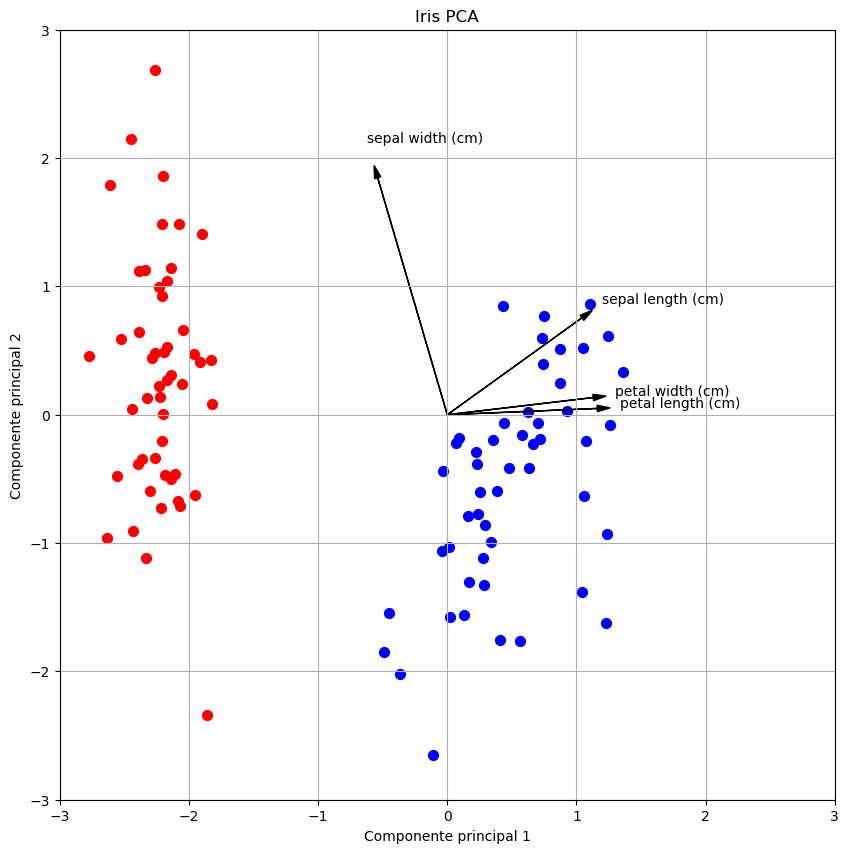

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_title('Iris PCA')
targets = [0,1]
colores = ['r','b']

for target, color in zip (targets, colores):
    indicesBuenos = final_df['Target'] == target
    ax.scatter(final_df.loc[indicesBuenos, 'PC1'], final_df.loc[indicesBuenos, 'PC2'], c=color, s=50)

# Graficar los dos vectores principales
for i, (PC1, PC2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    arrow_size = 2
    #start_pos = [np.mean(df.iloc[:, 0]), np.mean(df.iloc[:, 1])]
    ax.arrow(#start_pos[0], start_pos[1], 
        0,0, arrow_size * PC1, arrow_size * PC2,
             head_width=0.05, head_length=0.1, linewidth=1, color='k')
    ax.text(#start_pos[0] 
        arrow_size * PC1 * 1.15, #start_pos[1] + 
        arrow_size * PC2 * 1.15,
            df.columns[i], color='k')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.grid()
plt.show()

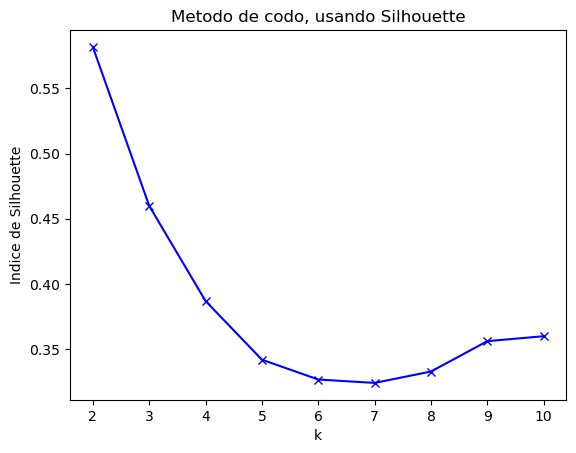

El numero optimo de grupos según Silhouette es: 2


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Aplicar K-means a diferentes valores de k y calcular el índice de Silhouette
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_std)
    silhouette_scores.append(silhouette_score(x_std, kmeans.labels_))

# Selección del num optimo de grupos
optimo = np.argmax(silhouette_scores) + 2 
#np.argmax()" devuelve el índice del valor máximo en un arreglo de numpy y se usa el dos, ya que no hace sentido que no puedes tener un grupo de 1

plt.plot(k_values, silhouette_scores, 'bx-') 
#La bx- es b de blue, x, para poner las cruces en cada punto y - es que es una linea solida para conectar los datos
plt.xlabel('k')
plt.ylabel('Indice de Silhouette')
plt.title('Metodo de codo, usando Silhouette')
plt.show()

print("El numero optimo de grupos según Silhouette es:", optimo)

In [75]:
from sklearn.model_selection import train_test_split

# Usar el número óptimo de grupos encontrado con el método Silhouette
k_optimo = optimo

# Aplicar K-means con el número óptimo de grupos
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(x_std)

# Asignar las etiquetas de grupo a cada muestra en los datos
labels = kmeans.labels_

# Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(componentesPrincipales, labels, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos de entrenamiento y prueba
escalador = StandardScaler()
x_train_std = escalador.fit_transform(x_train)
x_test_std = escalador.transform(x_test)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador de KNN con los dos grupos optimos
clasificador = KNeighborsClassifier(n_neighbors=2)

# Entrenar el clasificador con los datos de entrenamiento escalados
clasificador.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

In [93]:
from sklearn.metrics import accuracy_score

# Calibrar el modelo con los datos de prueba escalados
y_pred = clasificador.predict(x_test_std)

# Evaluar la precisión del modelo en los datos de prueba
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 1.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
#Matriz de confusión:

In [79]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20  0]
 [ 0 10]]


In [85]:
len(y_pred) #Aquí podemos observar que el total se incluye en la matriz de confusión

30

20 es el número de verdaderos positivos o sea que, el modelo hizo correctamente 20 muestras en la clase 1.

0 de arriba a la derecha, indica los falsos positivos en la clase 2.

0 de abajo a la izquierda es falso negativos, o sea que no clasifico ninguno mal de la clase 1.

10 es el número de verdaderos negativos que clasificó 10 muestras correctamente en la clase 2.

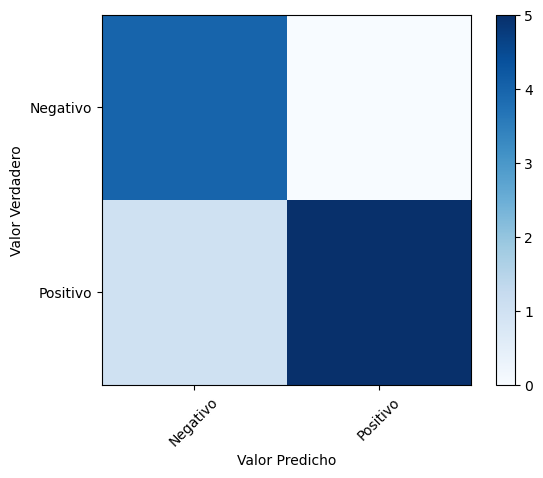

In [95]:
# Valores de verdad y predicción
y_true = [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
y_pred = [0, 0, 1, 1, 0, 0, 0, 1, 1, 1]

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Crear gráfico de matriz de confusión
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, ['Negativo', 'Positivo'], rotation=45)
plt.yticks(tick_marks, ['Negativo', 'Positivo'])
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Verdadero')
plt.show()

### 2.- Second approach (20%)

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target

In [17]:
#sumadecuadrados = []
#for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(X)
    #sumadecuadrados.append(kmeans.inertia_)

#La suma de los cuadrados dentro del cluster para cada valor de k.
#Init se usa para especificar el método de inicialización de los centroides
#max_iter es el número máximo de iteraciones que el algoritmo de k-means se va a ejecutar para cada ejecucion
#_init es el número de veces que se ejecutará el algoritmo de k-means con diferentes centroides iniciales
#random_state es una semilla aleatoria utilizada para la aleatorización
#Por ultimo .inertia devuelve la suma de las distancias al cuadrado de cada punto al centroide más cercano

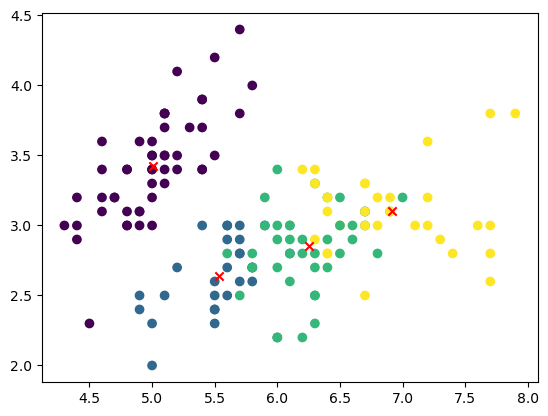

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

iris = load_iris()
X = iris.data
y = iris.target

# Utilizamos la función kmeans de Scipy para calcular los clusters
centroids, distortion = kmeans(X, k_or_guess=4)

# Asignamos cada observación a su respectivo cluster
idx, _ = vq(X, centroids) #el _ se utiliza para decir que no vamos a usar el segundo valor

# Graficamos los clusters
plt.scatter(X[:, 0], X[:, 1], c=idx)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
plt.show()

In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

c) Finally select one of the classification algorithms (SVM,KNN or DT) to calibrate the
selected classification algorithm. Use a kernel strategy to improve the data
classification.

d) Apply a classification performance measure (F-measure, accuracy, confusion
matrix).

In [31]:
# dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# creamos un clasificador de vecinos más cercanos (KNN)
classifier = KNeighborsClassifier()

# entrenamos el modelo
classifier.fit(X_train, y_train)

# predecimos las etiquetas para los datos de prueba
y_pred = classifier.predict(X_test)

# evaluamos el rendimiento utilizando la puntuación F1
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

F1 score: 0.9779434092477569


### 3.- Second approach (10%)

En los ejemplos anteriores en la primera parte se uso antes el PCA y en la segunda trabajamos los datos directamente. 
Al reducir las dimensiones en PCA, Claramente aumentamos la eficiencia computacional, sin embargo, en estos ejemplos, claramente existio un trabajo más extenso y con más lineas de código que quizá no ayudan tanto a defender el presente argumento.
Una gran desventaja también de reducir antes con PCA es que se presta a omitir cierta información, al realizar este proceso.
Por otro lado para trabajar los datos directamente sin realizar una reducción de dimensiones, trabajamos todos los datos, lo que significa que puede ser más certero que el otro método, podemos crear un sobreajuste o el entrenamiento se vuelve más largo al contar con más datos.
En conclusión depende mucho del objetivo de la investigación para elegir el modelo correcto. En el caso de primero trabajar con PCA sería recomendado con una alta cantidad de trabajo mientras que no aplicarle un PCA cuando el total de datos no consume tanto tiempo máquina.